# Blondy's Soaring Prediction

Use herbie to build out a windgram, copying all the functionality of RASP by Andrew Berkley and Peter Spear

In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from herbie.toolbox import EasyMap, pc
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd
import matplotlib as mpl

recent = pd.Timestamp("now").floor("6h") #- pd.Timedelta("6H")

 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ WARNING: Unable to create config file               │
 │      /Users/andrew/.config/herbie/config.toml        │
 │ Herbie will use standard default settings.           │
 │ Consider setting env variable HERBIE_CONFIG_PATH.    │
 ╰──────────────────────────────────────────────────────╯



In [2]:
# select locations to plot (lumby, revelstoke) by specifying their location in decimal degrees (E, N)
locations = {"coopers":{"longitude":-118.986010, "latitude":50.285681},
             "revelstoke":{"longitude":-118.092554,"latitude":50.959530},
            }


In [3]:
# pick out the variables we need for rasp and their respective levels
levels = ["ISBL_0550",           
          "ISBL_0600",
         ]
#           "ISBL_0650",
#           "ISBL_0700",           
#           "ISBL_0750",
#           "ISBL_0800",
#           "ISBL_0850",
#           "ISBL_0875",
#           "ISBL_0900",
#           "ISBL_0925",
#           "ISBL_0950",
#           "ISBL_0970",
#           "ISBL_0985",
#           "ISBL_1015",
#          ]

variables = {"TCDC":["Sfc"],
             "HPBL":["Sfc"],
             "PRATE":["Sfc"],
             "PRES":["Sfc"],
             "ORGPHY":["Sfc"],
             "HGT":levels,
             "TMP":levels,
             "WIND":levels,
             "WDIR":levels,
            }

In [4]:
tstore = [] # timesteps
for fxx in np.arange(1,8): 
    vstore = [] # variable names
    for var in variables:
        print(var)
        lstore = [] # variable level (z)
        for level in variables[var]:
            __ds = Herbie(
                recent,
                model="hrdps",
                fxx=int(fxx),
                product="continental/2.5km",
                variable=var,
                level=level,
                timeout=None
                ).xarray()

            # if the variable name is unknown, assign it
            if "unknown" in __ds:
                __ds = __ds.rename({"unknown":var})

            lstore.append(__ds)
        if len(variables[var]) > 1: # this only works for pressure levels at present. caution.
            __ds = xr.concat(lstore, dim="isobaricInhPa")
        vstore.append(__ds)  
    _ds = xr.merge(vstore)
    tstore.append(_ds)
ds = xr.concat(tstore, dim="valid_time") # merge timesteps

TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/Users/andrew/data/hrdps/20241208]


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F01 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F02 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F04 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F05 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TCDC
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HPBL
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRATE
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


PRES
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


ORGPHY
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc2 ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


HGT
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


TMP
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WIND
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


WDIR
✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2024-Dec-08 06:00 UTC F07 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


In [5]:
ds["lr"] = ds.t.diff(dim="isobaricInhPa") / ds.gh.diff(dim="isobaricInhPa") # calculate lapse rate (degC/m)

In [6]:
location="revelstoke"
# select the closest pixel to "revelstoke"
# HRDPS doesnt grid on lat/lon, so this becomes necessary
revelstoke = ds.sel((((ds.longitude - locations[location]["longitude"]) ** 2 
       + (ds.latitude - locations[location]["latitude"]) ** 2) ** 0.5).argmin(dim=["x", "y"]))
revelstoke = revelstoke.roll(valid_time=-8) #tz_localize('UTC').tz_convert('America/Vancouver') # make this less naive

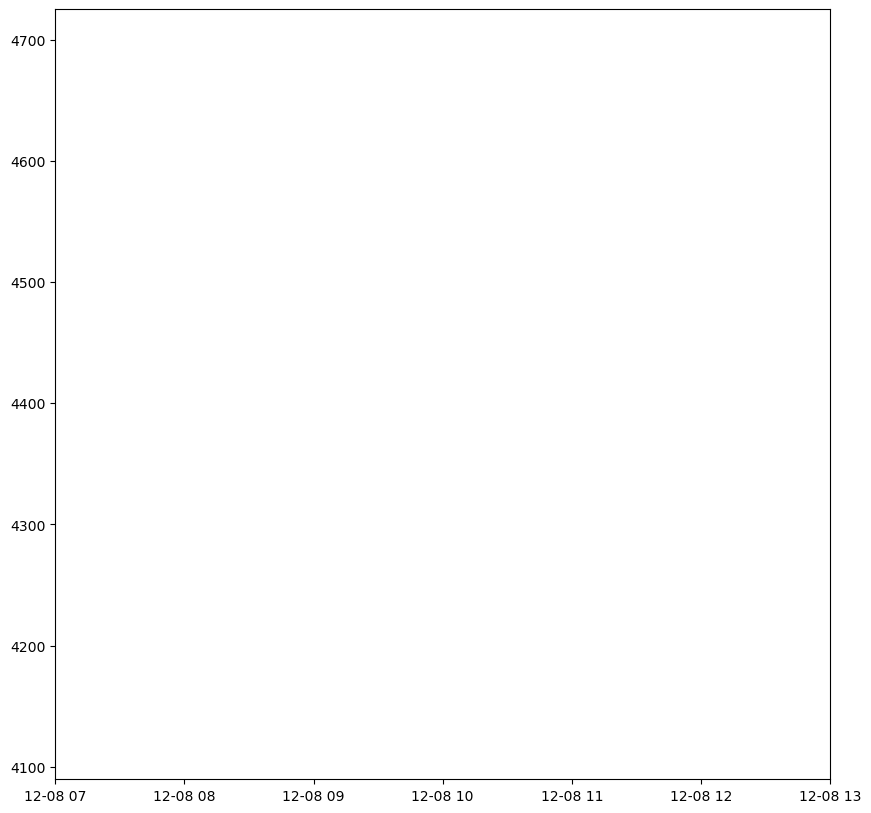

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
lr_cmap = mpl.colors.ListedColormap(['#ff0000',
                                     '#ffa500',
                                     '#ff69b4',
                                     '#9370db',
                                     '#eee8aa',
                                     '#b0c4de',
                                     '#DCDCDC',
                                     '#808080',
                                    ])
lr_bounds = [-0.0098, -0.0085, -0.00725, -0.006, 0.000, 0.0025, 0.005]
lr_norm = mpl.colors.BoundaryNorm(lr_bounds, lr_cmap.N)
ax.contourf(revelstoke.valid_time, revelstoke.gh[0].values, revelstoke.lr.T, cmap=lr_cmap)
#ax.invert_yaxis()
#ax.set_yticks(ticks=revelstoke.isobaricInhPa.values, labels=revelstoke.gh[0].values)


(array([4.0000000e+00, 9.0000000e+00, 2.4814600e+05, 6.3829820e+06,
        1.0134956e+07, 5.0364710e+06, 9.9929100e+05, 1.2804000e+05,
        5.9620000e+03, 3.3900000e+02]),
 array([-0.01539338, -0.01333268, -0.01127197, -0.00921126, -0.00715056,
        -0.00508985, -0.00302915, -0.00096844,  0.00109226,  0.00315297,
         0.00521367]),
 <BarContainer object of 10 artists>)

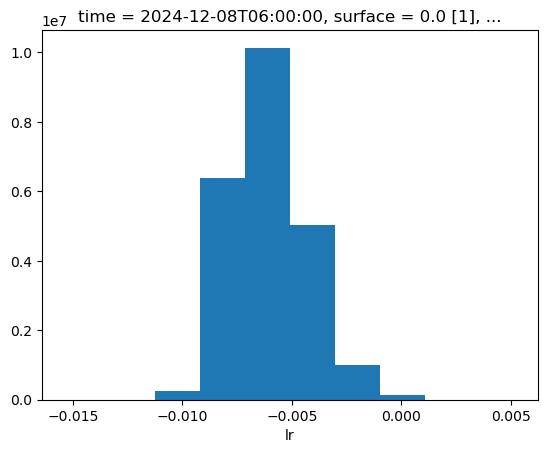

In [10]:
ds.lr.plot()